# Data Analisys
Here you can find all steps of data analisys.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Firts of all load aquired results

In [8]:
dp_results = pd.read_csv('./results/results_dp.csv')
aco_results = pd.read_csv('./results/results_aco.csv')
ga_results = pd.read_csv('./results/results_ga.csv')

Now we can preview our data

In [9]:
print(dp_results.head(5))

   Graph Size  Execution Time (s)  Iterations  Memory (bytes)  \
0           3               1.130           5             480   
1           4               1.120          16             960   
2           5               1.119          53            3496   
3           6               1.151         166            6728   
4           7               1.127         487           27400   

                          Shortest Path  Path Length (m)  
0                      0 -> 1 -> 2 -> 0          1153.74  
1                 0 -> 1 -> 2 -> 3 -> 0          1218.56  
2            0 -> 1 -> 2 -> 3 -> 4 -> 0          1289.25  
3       0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0          1466.98  
4  0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0          1499.68  


In [10]:
aco_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,3.420,1000,490.636719,0 -> 2 -> 1 -> 0,1153.74
1,4,3.848,1000,633.632812,0 -> 3 -> 2 -> 1 -> 0,1218.56
2,5,4.238,1000,774.273438,0 -> 4 -> 3 -> 2 -> 1 -> 0,1289.25
3,6,4.678,1000,915.164062,0 -> 5 -> 1 -> 2 -> 3 -> 4 -> 0,1466.98
4,7,5.266,1000,1052.628906,0 -> 5 -> 6 -> 4 -> 3 -> 2 -> 1 -> 0,1499.68


In [11]:
ga_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,7.861,1000,23566,0 -> 1 -> 2 -> 0,1153.74
1,4,8.284,1000,25326,0 -> 1 -> 2 -> 3 -> 0,1218.56
2,5,9.030,1000,26558,0 -> 4 -> 3 -> 2 -> 1 -> 0,1289.25
3,6,10.025,1000,28326,0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0,1466.98
4,7,9.477,1000,29774,0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0,1499.68


Firs of all analyse DP solution as perfect (Since it is guarantied that path will be the shortest)

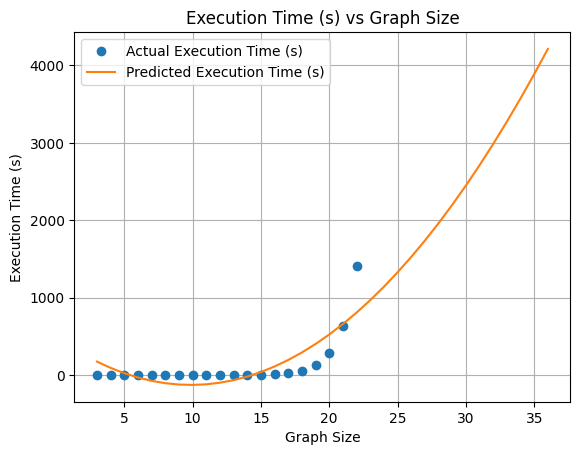

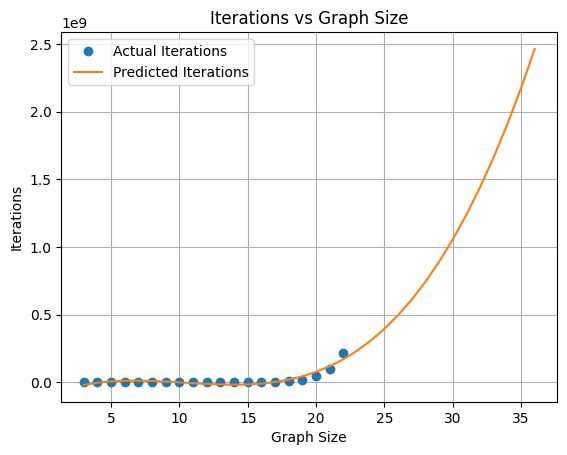

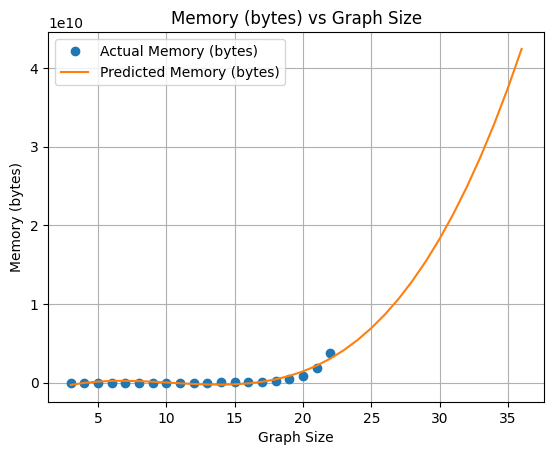

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prediction range
x = dp_results['Graph Size'].values.reshape(-1, 1)
x_pred = np.arange(3, 37).reshape(-1, 1)

# Function to plot and predict
def plot_and_predict(y_column, degree=2):
    y = dp_results[y_column].values
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)

    X_pred_poly = poly.transform(x_pred)
    y_pred = model.predict(X_pred_poly)

    plt.plot(dp_results['Graph Size'], y, 'o', label=f'Actual {y_column}')
    plt.plot(x_pred.flatten(), y_pred, '-', label=f'Predicted {y_column}')
    plt.xlabel('Graph Size')
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each metric
plot_and_predict('Execution Time (s)', degree=2)
plot_and_predict('Iterations', degree=3)
plot_and_predict('Memory (bytes)', degree=3)


We can see that with increasing size of graph complexity groth exponentially

Now we can take a look at genetic algorithms

About ACO

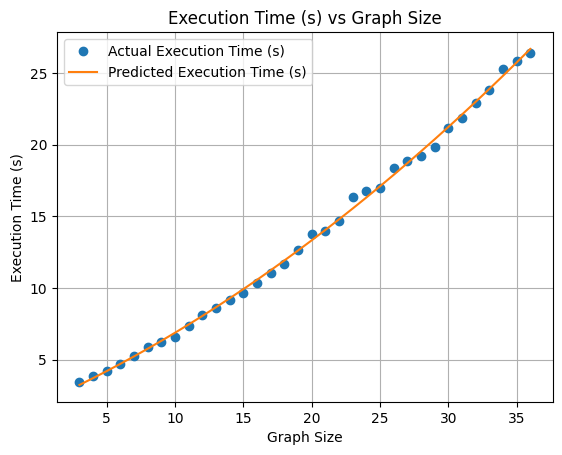

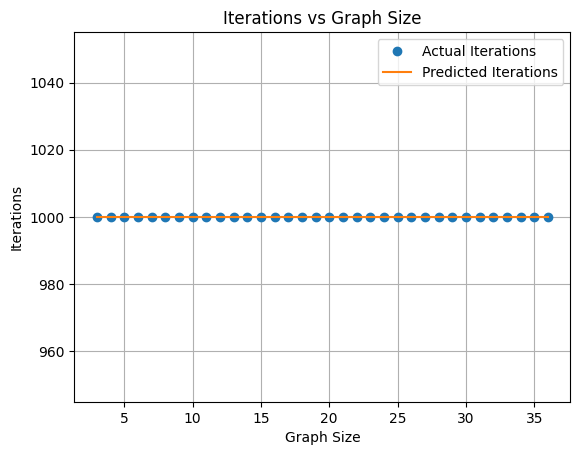

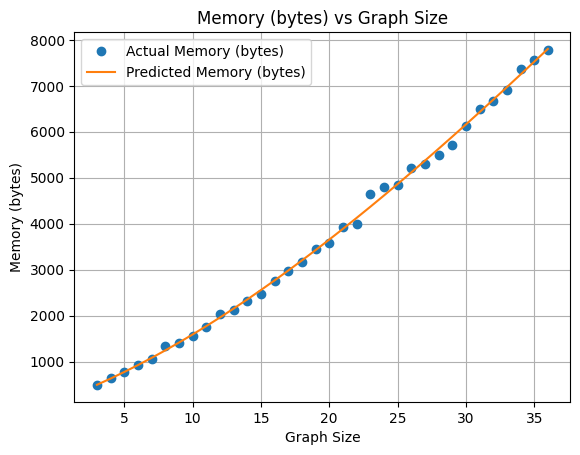

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prediction range
x = aco_results['Graph Size'].values.reshape(-1, 1)
x_pred = np.arange(3, 37).reshape(-1, 1)

# Function to plot and predict
def plot_and_predict(y_column, degree=2):
    y = aco_results[y_column].values
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)

    X_pred_poly = poly.transform(x_pred)
    y_pred = model.predict(X_pred_poly)

    plt.plot(aco_results['Graph Size'], y, 'o', label=f'Actual {y_column}')
    plt.plot(x_pred.flatten(), y_pred, '-', label=f'Predicted {y_column}')
    plt.xlabel('Graph Size')
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each metric
plot_and_predict('Execution Time (s)', degree=2)
plot_and_predict('Iterations', degree=3)
plot_and_predict('Memory (bytes)', degree=3)


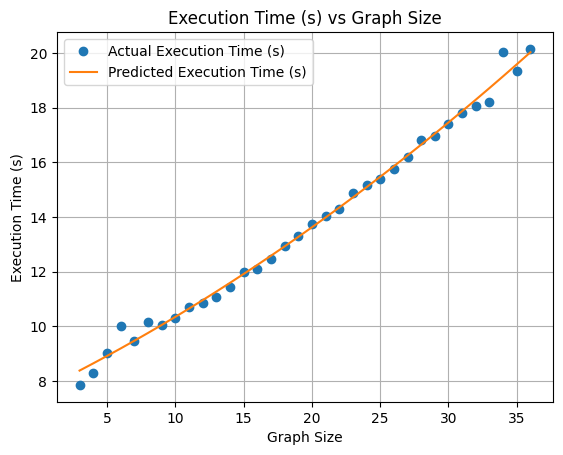

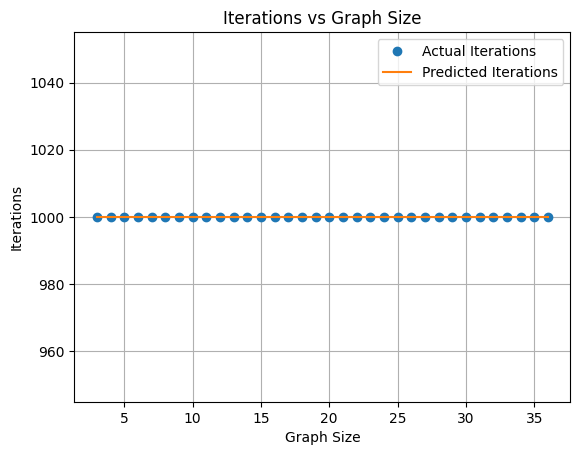

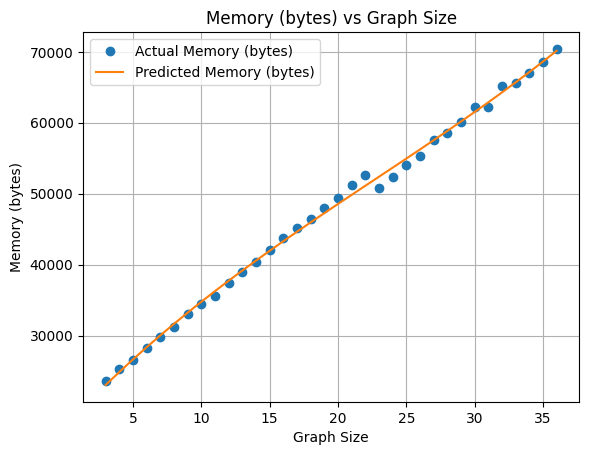

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prediction range
x = ga_results['Graph Size'].values.reshape(-1, 1)
x_pred = np.arange(3, 37).reshape(-1, 1)


# Function to plot and predict
def plot_and_predict(y_column, degree=2):
    y = ga_results[y_column].values
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)

    X_pred_poly = poly.transform(x_pred)
    y_pred = model.predict(X_pred_poly)

    plt.plot(ga_results['Graph Size'], y, 'o', label=f'Actual {y_column}')
    plt.plot(x_pred.flatten(), y_pred, '-', label=f'Predicted {y_column}')
    plt.xlabel('Graph Size')
    plt.ylabel(y_column)
    plt.title(f'{y_column} vs Graph Size')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_and_predict('Execution Time (s)', degree=2)
plot_and_predict('Iterations', degree=3)
plot_and_predict('Memory (bytes)', degree=3)


conclusion
Based on my research and observations, I have formulated the following assertions regarding the time efficiency of Dynamic Programming (DP), Ant Colony Optimization (ACO), and Genetic Algorithms (GA) across varying dataset sizes:​

Dynamic Programming (DP) — Optimal for Small Datasets

In scenarios involving small datasets, Dynamic Programming consistently delivers the fastest execution times. Its deterministic nature and ability to store intermediate results make it highly efficient for problems with limited complexity. For instance, in solving the Traveling Salesman Problem (TSP) with a small number of cities, DP outperforms other algorithms in terms of speed .

Ant Colony Optimization (ACO) — Effective for Medium-Sized Datasets

As the dataset size increases, the performance of DP diminishes due to exponential growth in computational requirements. In such cases, ACO becomes more suitable. Its heuristic approach allows for efficient exploration of larger solution spaces. Studies have shown that ACO maintains reasonable execution times for medium-sized TSP instances, making it a viable choice when DP becomes impractical

Genetic Algorithms (GA) — Preferred for Large Datasets

For large-scale problems, Genetic Algorithms exhibit superior scalability and time efficiency. Their population-based search mechanism enables effective exploration of vast solution spaces. Comparative analyses indicate that GA outperforms ACO in terms of execution time for large datasets, making it the preferred choice in such scenarios .​